<a href="https://colab.research.google.com/github/phureechaya/Dataset/blob/main/codeproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

27/02/67 การพยากรณ์อัตราผู้ว่างงานในระบบและนอกระบบในประเทศไทย

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [ ]:
df = pd.read_csv('dataset_unemployment2.csv')
df

,system,year,quarter,region,SEX,age_group,OCCUPATION,labor_force_sta,value,unit,source
0,ในระบบ,2561,ไตรมาสที่ 3,ภาคเหนือ,ชาย,60 ปีขึ้นไป,นายจ้าง,รวม,0.37,พันคน,สำนักงานสถิติแห่งชาติ
1,ในระบบ,2561,ไตรมาสที่ 3,ภาคเหนือ,ชาย,60 ปีขึ้นไป,ประกอบธุรกิจส่วนตัว,หางานทำ,0.17,พันคน,สำนักงานสถิติแห่งชาติ
2,ในระบบ,2561,ไตรมาสที่ 3,ภาคเหนือ,ชาย,60 ปีขึ้นไป,ช่วยธุรกิจครัวเรือน,ไม่หางานทำ/พร้อมที่จะทำงาน,0.20,พันคน,สำนักงานสถิติแห่งชาติ
3,ในระบบ,2561,ไตรมาสที่ 4,ภาคเหนือ,ชาย,60 ปีขึ้นไป,ลูกจ้างรัฐบาล,รวม,1.83,พันคน,สำนักงานสถิติแห่งชาติ
4,ในระบบ,2561,ไตรมาสที่ 4,ภาคเหนือ,ชาย,60 ปีขึ้นไป,ลูกจ้างเอกชน,หางานทำ,0.11,พันคน,สำนักงานสถิติแห่งชาติ
...,...,...,...,...,...,...,...,...,...,...,...
5234,นอกระบบ,2561,ไตรมาสที่ 1,ทั่วประเทศ,รวม,25-29 ปี,ช่วยธุรกิจครัวเรือน,หางานทำ,5956.97,พันคน,สำนักงานสถิติแห่งชาติ
5235,นอกระบบ,2561,ไตรมาสที่ 1,ทั่วประเทศ,ชาย,25-29 ปี,ลูกจ้างรัฐบาล,ไม่หางานทำ/พร้อมที่จะทำงาน,97.33,พันคน,สำนักงานสถิติแห่งชาติ
5236,นอกระบบ,2561,ไตรมาสที่ 2,ทั่วประเทศ,หญิง,25-29 ปี,ลูกจ้างเอกชน,รวม,1214.93,พันคน,สำนักงานสถิติแห่งชาติ
5237,นอกระบบ,2561,ไตรมาสที่ 2,ทั่วประเทศ,รวม,25-29 ปี,การรวมกลุ่ม,หางานทำ,44.49,พันคน,สำนักงานสถิติแห่งชาติ


In [ ]:
# เปลี่ยนชื่อคอลัมน์ให้เป็นตัวอักษรพิมพ์เล็ก
df.columns = df.columns.str.lower()
df.to_csv('updated_data.csv', index=False)
df

,system,year,quarter,region,sex,age_group,occupation,labor_force_sta,value,unit,source
0,ในระบบ,2561,ไตรมาสที่ 3,ภาคเหนือ,ชาย,60 ปีขึ้นไป,นายจ้าง,รวม,0.37,พันคน,สำนักงานสถิติแห่งชาติ
1,ในระบบ,2561,ไตรมาสที่ 3,ภาคเหนือ,ชาย,60 ปีขึ้นไป,ประกอบธุรกิจส่วนตัว,หางานทำ,0.17,พันคน,สำนักงานสถิติแห่งชาติ
2,ในระบบ,2561,ไตรมาสที่ 3,ภาคเหนือ,ชาย,60 ปีขึ้นไป,ช่วยธุรกิจครัวเรือน,ไม่หางานทำ/พร้อมที่จะทำงาน,0.20,พันคน,สำนักงานสถิติแห่งชาติ
3,ในระบบ,2561,ไตรมาสที่ 4,ภาคเหนือ,ชาย,60 ปีขึ้นไป,ลูกจ้างรัฐบาล,รวม,1.83,พันคน,สำนักงานสถิติแห่งชาติ
4,ในระบบ,2561,ไตรมาสที่ 4,ภาคเหนือ,ชาย,60 ปีขึ้นไป,ลูกจ้างเอกชน,หางานทำ,0.11,พันคน,สำนักงานสถิติแห่งชาติ
...,...,...,...,...,...,...,...,...,...,...,...
5234,นอกระบบ,2561,ไตรมาสที่ 1,ทั่วประเทศ,รวม,25-29 ปี,ช่วยธุรกิจครัวเรือน,หางานทำ,5956.97,พันคน,สำนักงานสถิติแห่งชาติ
5235,นอกระบบ,2561,ไตรมาสที่ 1,ทั่วประเทศ,ชาย,25-29 ปี,ลูกจ้างรัฐบาล,ไม่หางานทำ/พร้อมที่จะทำงาน,97.33,พันคน,สำนักงานสถิติแห่งชาติ
5236,นอกระบบ,2561,ไตรมาสที่ 2,ทั่วประเทศ,หญิง,25-29 ปี,ลูกจ้างเอกชน,รวม,1214.93,พันคน,สำนักงานสถิติแห่งชาติ
5237,นอกระบบ,2561,ไตรมาสที่ 2,ทั่วประเทศ,รวม,25-29 ปี,การรวมกลุ่ม,หางานทำ,44.49,พันคน,สำนักงานสถิติแห่งชาติ


In [ ]:
#ตรวจสอบค่า Outlier ใน Dataset
df = pd.read_csv('dataset_unemployment2.csv')

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = ((df < lower_bound) | (df > upper_bound))

print(outliers.sum())

OCCUPATION           0
SEX                  0
age_group            0
labor_force_sta      0
quarter              0
region               0
source               0
system               0
unit                 0
value              729
year                 0
dtype: int64


In [ ]:
#หาค่า Duplicate ใน Dataset
df = pd.read_csv('updated_data.csv')
duplicates = df[df.duplicated()]

In [ ]:
print(duplicates)

Empty DataFrame
Columns: [system, year, quarter, region, sex, age_group, occupation, labor_force_sta, value, unit, source]
Index: []


In [ ]:
df.shape

(5239, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5239 entries, 0 to 5238
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   system           5239 non-null   object 
 1   year             5239 non-null   int64  
 2   quarter          5239 non-null   object 
 3   region           5239 non-null   object 
 4   sex              5239 non-null   object 
 5   age_group        5239 non-null   object 
 6   occupation       5239 non-null   object 
 7   labor_force_sta  5239 non-null   object 
 8   value            5239 non-null   float64
 9   unit             5239 non-null   object 
 10  source           5239 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 450.4+ KB


In [ ]:
df.describe()

,year,value
count,5239.000000,5239.000000
mean,2559.521474,111.128387
std,2.289364,786.207790
min,2556.000000,0.000000
25%,2558.000000,2.175000
50%,2560.000000,6.600000
75%,2562.000000,22.200000
max,2563.000000,20333.040000


In [ ]:
df.isnull().sum()

system             0
year               0
quarter            0
region             0
sex                0
age_group          0
occupation         0
labor_force_sta    0
value              0
unit               0
source             0
dtype: int64

In [ ]:
df = df.drop('source', axis=1)
df

,system,year,quarter,region,sex,age_group,occupation,labor_force_sta,value,unit
0,ในระบบ,2561,ไตรมาสที่ 3,ภาคเหนือ,ชาย,60 ปีขึ้นไป,นายจ้าง,รวม,0.37,พันคน
1,ในระบบ,2561,ไตรมาสที่ 3,ภาคเหนือ,ชาย,60 ปีขึ้นไป,ประกอบธุรกิจส่วนตัว,หางานทำ,0.17,พันคน
2,ในระบบ,2561,ไตรมาสที่ 3,ภาคเหนือ,ชาย,60 ปีขึ้นไป,ช่วยธุรกิจครัวเรือน,ไม่หางานทำ/พร้อมที่จะทำงาน,0.20,พันคน
3,ในระบบ,2561,ไตรมาสที่ 4,ภาคเหนือ,ชาย,60 ปีขึ้นไป,ลูกจ้างรัฐบาล,รวม,1.83,พันคน
4,ในระบบ,2561,ไตรมาสที่ 4,ภาคเหนือ,ชาย,60 ปีขึ้นไป,ลูกจ้างเอกชน,หางานทำ,0.11,พันคน
...,...,...,...,...,...,...,...,...,...,...
5234,นอกระบบ,2561,ไตรมาสที่ 1,ทั่วประเทศ,รวม,25-29 ปี,ช่วยธุรกิจครัวเรือน,หางานทำ,5956.97,พันคน
5235,นอกระบบ,2561,ไตรมาสที่ 1,ทั่วประเทศ,ชาย,25-29 ปี,ลูกจ้างรัฐบาล,ไม่หางานทำ/พร้อมที่จะทำงาน,97.33,พันคน
5236,นอกระบบ,2561,ไตรมาสที่ 2,ทั่วประเทศ,หญิง,25-29 ปี,ลูกจ้างเอกชน,รวม,1214.93,พันคน
5237,นอกระบบ,2561,ไตรมาสที่ 2,ทั่วประเทศ,รวม,25-29 ปี,การรวมกลุ่ม,หางานทำ,44.49,พันคน


In [ ]:
df = df.drop('unit', axis=1)
df

,system,year,quarter,region,sex,age_group,occupation,labor_force_sta,value
0,ในระบบ,2561,ไตรมาสที่ 3,ภาคเหนือ,ชาย,60 ปีขึ้นไป,นายจ้าง,รวม,0.37
1,ในระบบ,2561,ไตรมาสที่ 3,ภาคเหนือ,ชาย,60 ปีขึ้นไป,ประกอบธุรกิจส่วนตัว,หางานทำ,0.17
2,ในระบบ,2561,ไตรมาสที่ 3,ภาคเหนือ,ชาย,60 ปีขึ้นไป,ช่วยธุรกิจครัวเรือน,ไม่หางานทำ/พร้อมที่จะทำงาน,0.20
3,ในระบบ,2561,ไตรมาสที่ 4,ภาคเหนือ,ชาย,60 ปีขึ้นไป,ลูกจ้างรัฐบาล,รวม,1.83
4,ในระบบ,2561,ไตรมาสที่ 4,ภาคเหนือ,ชาย,60 ปีขึ้นไป,ลูกจ้างเอกชน,หางานทำ,0.11
...,...,...,...,...,...,...,...,...,...
5234,นอกระบบ,2561,ไตรมาสที่ 1,ทั่วประเทศ,รวม,25-29 ปี,ช่วยธุรกิจครัวเรือน,หางานทำ,5956.97
5235,นอกระบบ,2561,ไตรมาสที่ 1,ทั่วประเทศ,ชาย,25-29 ปี,ลูกจ้างรัฐบาล,ไม่หางานทำ/พร้อมที่จะทำงาน,97.33
5236,นอกระบบ,2561,ไตรมาสที่ 2,ทั่วประเทศ,หญิง,25-29 ปี,ลูกจ้างเอกชน,รวม,1214.93
5237,นอกระบบ,2561,ไตรมาสที่ 2,ทั่วประเทศ,รวม,25-29 ปี,การรวมกลุ่ม,หางานทำ,44.49


In [ ]:
df['value'] = df['value'] * 1000
df

,system,year,quarter,region,sex,age_group,occupation,labor_force_sta,value
0,ในระบบ,2561,ไตรมาสที่ 3,ภาคเหนือ,ชาย,60 ปีขึ้นไป,นายจ้าง,รวม,370.0
1,ในระบบ,2561,ไตรมาสที่ 3,ภาคเหนือ,ชาย,60 ปีขึ้นไป,ประกอบธุรกิจส่วนตัว,หางานทำ,170.0
2,ในระบบ,2561,ไตรมาสที่ 3,ภาคเหนือ,ชาย,60 ปีขึ้นไป,ช่วยธุรกิจครัวเรือน,ไม่หางานทำ/พร้อมที่จะทำงาน,200.0
3,ในระบบ,2561,ไตรมาสที่ 4,ภาคเหนือ,ชาย,60 ปีขึ้นไป,ลูกจ้างรัฐบาล,รวม,1830.0
4,ในระบบ,2561,ไตรมาสที่ 4,ภาคเหนือ,ชาย,60 ปีขึ้นไป,ลูกจ้างเอกชน,หางานทำ,110.0
...,...,...,...,...,...,...,...,...,...
5234,นอกระบบ,2561,ไตรมาสที่ 1,ทั่วประเทศ,รวม,25-29 ปี,ช่วยธุรกิจครัวเรือน,หางานทำ,5956970.0
5235,นอกระบบ,2561,ไตรมาสที่ 1,ทั่วประเทศ,ชาย,25-29 ปี,ลูกจ้างรัฐบาล,ไม่หางานทำ/พร้อมที่จะทำงาน,97330.0
5236,นอกระบบ,2561,ไตรมาสที่ 2,ทั่วประเทศ,หญิง,25-29 ปี,ลูกจ้างเอกชน,รวม,1214930.0
5237,นอกระบบ,2561,ไตรมาสที่ 2,ทั่วประเทศ,รวม,25-29 ปี,การรวมกลุ่ม,หางานทำ,44490.0


สร้างกราฟแสดงจำนวนประชากร ชาย หญิง และ รวม(กรณีที่ไม่ต่องการระบุ) ต่อปี

In [ ]:
# นับจำนวนของเพศแต่ละประเภท
gender_counts = df['sex'].value_counts()

# แสดงผลลัพธ์
print(gender_counts)

ชาย     1754
หญิง    1754
รวม     1731
Name: sex, dtype: int64


sex   ชาย  รวม  หญิง
year                
2556  226  192   221
2557  198  232   225
2558  231  229   191
2559  224  194   234
2560  210  226   224
2561  241  209   215
2562  202  223   223
2563  222  226   221


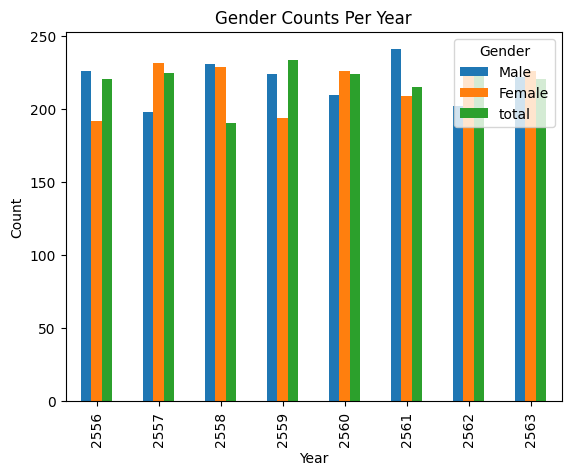

In [ ]:
import matplotlib.pyplot as plt
# นับจำนวนของเพศแต่ละประเภทแยกตามปี
gender_counts_per_year = df.groupby(['year', 'sex']).size().unstack()

# แสดงผลลัพธ์
print(gender_counts_per_year)

# Assuming 'gender_counts_per_year' is your DataFrame
# You can use the following code to create a side-by-side bar plot

gender_counts_per_year.plot(kind='bar', stacked=False)
plt.title('Gender Counts Per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Gender', loc='upper right', labels=['Male', 'Female', 'total'])
plt.show()

In [ ]:
# นับจำนวนของภูมิภาคแต่ละประเภทแยกตามปี
gender_counts_per_year = df.groupby(['year', 'region']).size().unstack()

# แสดงผลลัพธ์
print(gender_counts_per_year)

region  กรุงเทพมหานคร  ทั่วประเทศ  ภาคกลาง  ภาคตะวันออกเฉียงเหนือ  ภาคเหนือ  \
year                                                                          
2556              108         109      107                     98       108   
2557               87         120      122                    112       112   
2558               95         114      104                    113       115   
2559               99         111      117                    107       103   
2560               89         120      118                    106       116   
2561              103         114      112                    107       118   
2562               90         117      111                    110       113   
2563               97         120      117                    112       109   

region  ภาคใต้  
year            
2556       109  
2557       102  
2558       110  
2559       115  
2560       111  
2561       111  
2562       107  
2563       114  


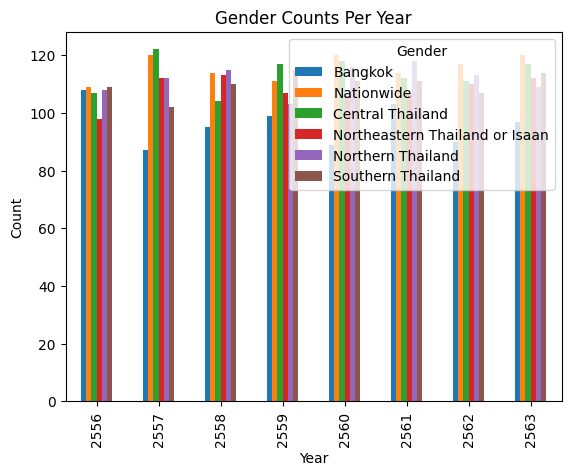

In [ ]:
import matplotlib.pyplot as plt
# Assuming 'gender_counts_per_year' is your DataFrame
# You can use the following code to create a side-by-side bar plot

gender_counts_per_year.plot(kind='bar', stacked=False)
plt.title('Gender Counts Per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Gender', loc='upper right', labels=['Bangkok', 'Nationwide', 'Central Thailand', 'Northeastern Thailand or Isaan', 'Northern Thailand', 'Southern Thailand '])
plt.show()

In [ ]:
import plotly.express as px
import pandas as pd

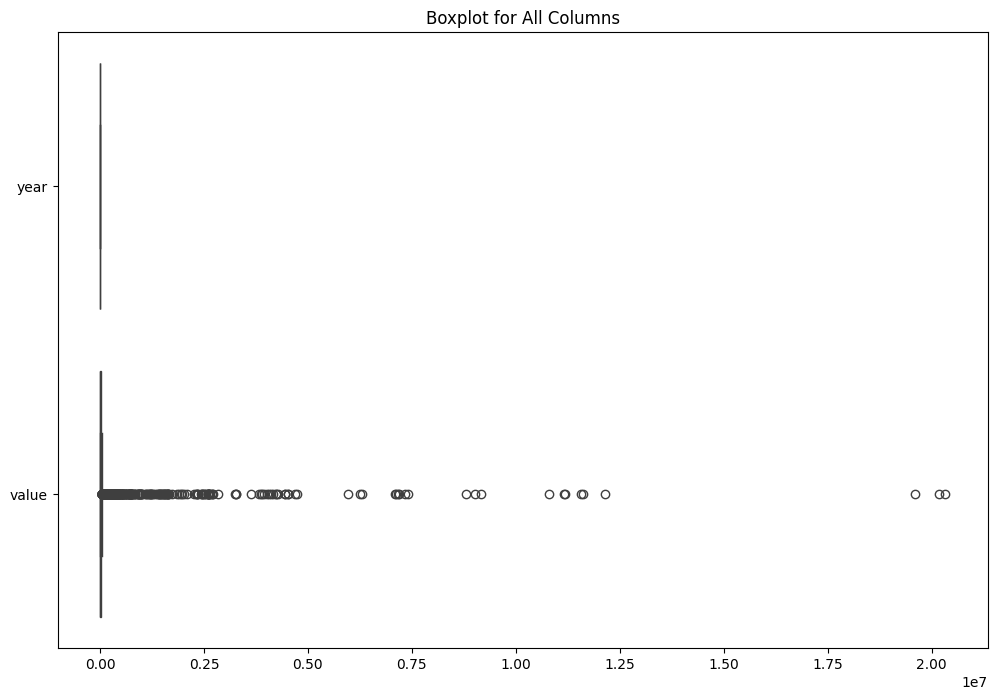

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# สร้างแผนภูมิ Boxplot โดยใช้ Seaborn
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, orient="h")  # orient="h" หมายถึงแสดงแนวนอน
plt.title('Boxplot for All Columns')
plt.show()

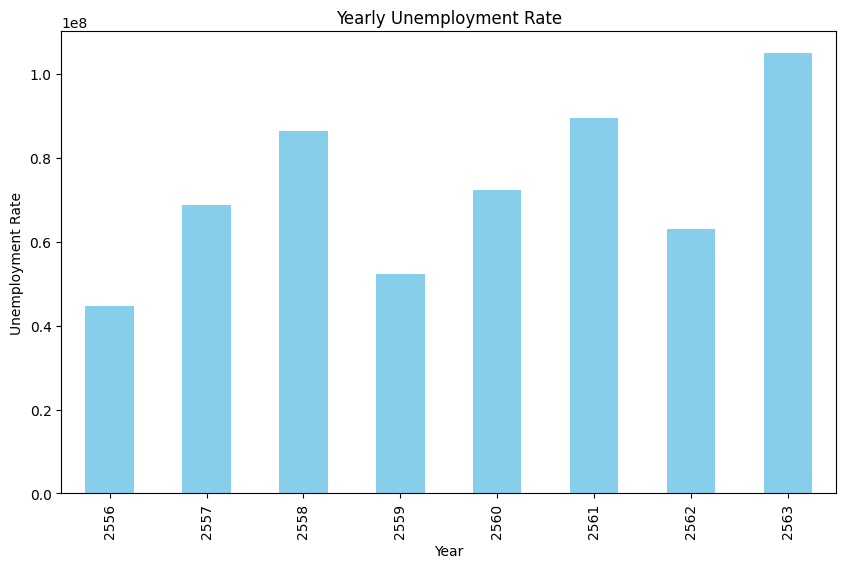

In [ ]:
grouped = df.groupby('year')['value'].sum()
# สร้างกราฟแท่ง
plt.figure(figsize=(10, 6))
grouped.plot(kind='bar', color='skyblue')
plt.title('Yearly Unemployment Rate')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.show()

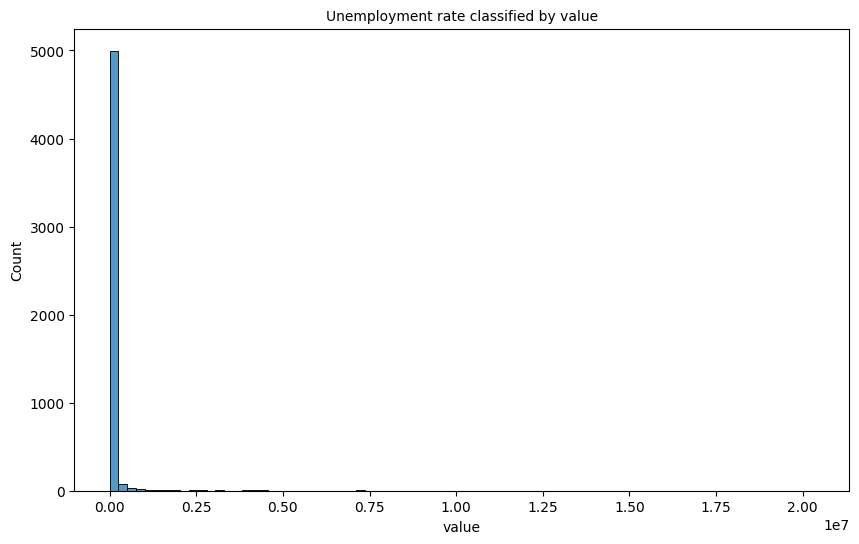

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['value'],bins=80)
plt.title('Unemployment rate classified by value', fontsize=10)
plt.show()

การพยากรณ์อัตราการว่างงาน

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import pickle
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

In [ ]:
df

,system,year,quarter,region,sex,age_group,occupation,labor_force_sta,value
0,ในระบบ,2561,ไตรมาสที่ 3,ภาคเหนือ,ชาย,60 ปีขึ้นไป,นายจ้าง,รวม,370.0
1,ในระบบ,2561,ไตรมาสที่ 3,ภาคเหนือ,ชาย,60 ปีขึ้นไป,ประกอบธุรกิจส่วนตัว,หางานทำ,170.0
2,ในระบบ,2561,ไตรมาสที่ 3,ภาคเหนือ,ชาย,60 ปีขึ้นไป,ช่วยธุรกิจครัวเรือน,ไม่หางานทำ/พร้อมที่จะทำงาน,200.0
3,ในระบบ,2561,ไตรมาสที่ 4,ภาคเหนือ,ชาย,60 ปีขึ้นไป,ลูกจ้างรัฐบาล,รวม,1830.0
4,ในระบบ,2561,ไตรมาสที่ 4,ภาคเหนือ,ชาย,60 ปีขึ้นไป,ลูกจ้างเอกชน,หางานทำ,110.0
...,...,...,...,...,...,...,...,...,...
5234,นอกระบบ,2561,ไตรมาสที่ 1,ทั่วประเทศ,รวม,25-29 ปี,ช่วยธุรกิจครัวเรือน,หางานทำ,5956970.0
5235,นอกระบบ,2561,ไตรมาสที่ 1,ทั่วประเทศ,ชาย,25-29 ปี,ลูกจ้างรัฐบาล,ไม่หางานทำ/พร้อมที่จะทำงาน,97330.0
5236,นอกระบบ,2561,ไตรมาสที่ 2,ทั่วประเทศ,หญิง,25-29 ปี,ลูกจ้างเอกชน,รวม,1214930.0
5237,นอกระบบ,2561,ไตรมาสที่ 2,ทั่วประเทศ,รวม,25-29 ปี,การรวมกลุ่ม,หางานทำ,44490.0


In [ ]:
df2 = df.groupby(['system'])['system'].count()
df2

system
นอกระบบ     378
ในระบบ     4861
Name: system, dtype: int64

In [ ]:
# สร้าง mapping ของค่าเดิมและค่าใหม่
system_mapping = {
    'ในระบบ': 1,
    'นอกระบบ': 2,
}

# ใช้เมธอด replace เพื่อเปลี่ยนค่าในคอลัมน์ 'system'
df['system'] = df['system'].replace(system_mapping)
df

,system,year,quarter,region,sex,age_group,occupation,labor_force_sta,value
0,1,2561,ไตรมาสที่ 3,ภาคเหนือ,ชาย,60 ปีขึ้นไป,นายจ้าง,รวม,370.0
1,1,2561,ไตรมาสที่ 3,ภาคเหนือ,ชาย,60 ปีขึ้นไป,ประกอบธุรกิจส่วนตัว,หางานทำ,170.0
2,1,2561,ไตรมาสที่ 3,ภาคเหนือ,ชาย,60 ปีขึ้นไป,ช่วยธุรกิจครัวเรือน,ไม่หางานทำ/พร้อมที่จะทำงาน,200.0
3,1,2561,ไตรมาสที่ 4,ภาคเหนือ,ชาย,60 ปีขึ้นไป,ลูกจ้างรัฐบาล,รวม,1830.0
4,1,2561,ไตรมาสที่ 4,ภาคเหนือ,ชาย,60 ปีขึ้นไป,ลูกจ้างเอกชน,หางานทำ,110.0
...,...,...,...,...,...,...,...,...,...
5234,2,2561,ไตรมาสที่ 1,ทั่วประเทศ,รวม,25-29 ปี,ช่วยธุรกิจครัวเรือน,หางานทำ,5956970.0
5235,2,2561,ไตรมาสที่ 1,ทั่วประเทศ,ชาย,25-29 ปี,ลูกจ้างรัฐบาล,ไม่หางานทำ/พร้อมที่จะทำงาน,97330.0
5236,2,2561,ไตรมาสที่ 2,ทั่วประเทศ,หญิง,25-29 ปี,ลูกจ้างเอกชน,รวม,1214930.0
5237,2,2561,ไตรมาสที่ 2,ทั่วประเทศ,รวม,25-29 ปี,การรวมกลุ่ม,หางานทำ,44490.0


In [ ]:
df2 = df.groupby(['year'])['year'].count()
df2

year
2556    639
2557    655
2558    651
2559    652
2560    660
2561    665
2562    648
2563    669
Name: year, dtype: int64

In [ ]:
# สร้าง mapping ของค่าเดิมและค่าใหม่
year_mapping = {
    2555: 1,
    2556: 2,
    2557: 3,
    2558: 4,
    2559: 5,
    2560: 6,
    2561: 7,
    2562: 8,
    2563: 9
}

# ใช้เมธอด replace เพื่อเปลี่ยนค่าในคอลัมน์ 'year'
df['year'] = df['year'].replace(year_mapping)
df

,system,year,quarter,region,sex,age_group,occupation,labor_force_sta,value
0,1,7,ไตรมาสที่ 3,ภาคเหนือ,ชาย,60 ปีขึ้นไป,นายจ้าง,รวม,370.0
1,1,7,ไตรมาสที่ 3,ภาคเหนือ,ชาย,60 ปีขึ้นไป,ประกอบธุรกิจส่วนตัว,หางานทำ,170.0
2,1,7,ไตรมาสที่ 3,ภาคเหนือ,ชาย,60 ปีขึ้นไป,ช่วยธุรกิจครัวเรือน,ไม่หางานทำ/พร้อมที่จะทำงาน,200.0
3,1,7,ไตรมาสที่ 4,ภาคเหนือ,ชาย,60 ปีขึ้นไป,ลูกจ้างรัฐบาล,รวม,1830.0
4,1,7,ไตรมาสที่ 4,ภาคเหนือ,ชาย,60 ปีขึ้นไป,ลูกจ้างเอกชน,หางานทำ,110.0
...,...,...,...,...,...,...,...,...,...
5234,2,7,ไตรมาสที่ 1,ทั่วประเทศ,รวม,25-29 ปี,ช่วยธุรกิจครัวเรือน,หางานทำ,5956970.0
5235,2,7,ไตรมาสที่ 1,ทั่วประเทศ,ชาย,25-29 ปี,ลูกจ้างรัฐบาล,ไม่หางานทำ/พร้อมที่จะทำงาน,97330.0
5236,2,7,ไตรมาสที่ 2,ทั่วประเทศ,หญิง,25-29 ปี,ลูกจ้างเอกชน,รวม,1214930.0
5237,2,7,ไตรมาสที่ 2,ทั่วประเทศ,รวม,25-29 ปี,การรวมกลุ่ม,หางานทำ,44490.0


In [ ]:
df2 = df.groupby(['quarter'])['quarter'].count()
df2

quarter
ไตรมาสที่ 1    1293
ไตรมาสที่ 2    1317
ไตรมาสที่ 3    1316
ไตรมาสที่ 4    1313
Name: quarter, dtype: int64

In [ ]:
# สร้าง mapping ของค่าเดิมและค่าใหม่
quarter_mapping = {
    'ไตรมาสที่ 1' : 1,
    'ไตรมาสที่ 2': 2,
    'ไตรมาสที่ 3': 3,
    'ไตรมาสที่ 4': 4,
}

# ใช้เมธอด replace เพื่อเปลี่ยนค่าในคอลัมน์ 'quarter'
df['quarter'].replace(quarter_mapping, inplace=True)
df

,system,year,quarter,region,sex,age_group,occupation,labor_force_sta,value
0,1,7,3,ภาคเหนือ,ชาย,60 ปีขึ้นไป,นายจ้าง,รวม,370.0
1,1,7,3,ภาคเหนือ,ชาย,60 ปีขึ้นไป,ประกอบธุรกิจส่วนตัว,หางานทำ,170.0
2,1,7,3,ภาคเหนือ,ชาย,60 ปีขึ้นไป,ช่วยธุรกิจครัวเรือน,ไม่หางานทำ/พร้อมที่จะทำงาน,200.0
3,1,7,4,ภาคเหนือ,ชาย,60 ปีขึ้นไป,ลูกจ้างรัฐบาล,รวม,1830.0
4,1,7,4,ภาคเหนือ,ชาย,60 ปีขึ้นไป,ลูกจ้างเอกชน,หางานทำ,110.0
...,...,...,...,...,...,...,...,...,...
5234,2,7,1,ทั่วประเทศ,รวม,25-29 ปี,ช่วยธุรกิจครัวเรือน,หางานทำ,5956970.0
5235,2,7,1,ทั่วประเทศ,ชาย,25-29 ปี,ลูกจ้างรัฐบาล,ไม่หางานทำ/พร้อมที่จะทำงาน,97330.0
5236,2,7,2,ทั่วประเทศ,หญิง,25-29 ปี,ลูกจ้างเอกชน,รวม,1214930.0
5237,2,7,2,ทั่วประเทศ,รวม,25-29 ปี,การรวมกลุ่ม,หางานทำ,44490.0


In [ ]:
df2 = df.groupby(['region'])['region'].count()
df2

region
กรุงเทพมหานคร            768
ทั่วประเทศ               925
ภาคกลาง                  908
ภาคตะวันออกเฉียงเหนือ    865
ภาคเหนือ                 894
ภาคใต้                   879
Name: region, dtype: int64

In [ ]:
# สร้าง mapping ของค่าเดิมและค่าใหม่
region_mapping = {
    'กรุงเทพมหานคร': 1,
    'ทั่วประเทศ': 2,
    'ภาคกลาง': 3,
    'ภาคตะวันออกเฉียงเหนือ': 4,
    'ภาคเหนือ': 5,
    'ภาคใต้': 6
}

# ใช้เมธอด replace เพื่อเปลี่ยนค่าในคอลัมน์ 'region'
df['region'] = df['region'].replace(region_mapping)
df

,system,year,quarter,region,sex,age_group,occupation,labor_force_sta,value
0,1,7,3,5,ชาย,60 ปีขึ้นไป,นายจ้าง,รวม,370.0
1,1,7,3,5,ชาย,60 ปีขึ้นไป,ประกอบธุรกิจส่วนตัว,หางานทำ,170.0
2,1,7,3,5,ชาย,60 ปีขึ้นไป,ช่วยธุรกิจครัวเรือน,ไม่หางานทำ/พร้อมที่จะทำงาน,200.0
3,1,7,4,5,ชาย,60 ปีขึ้นไป,ลูกจ้างรัฐบาล,รวม,1830.0
4,1,7,4,5,ชาย,60 ปีขึ้นไป,ลูกจ้างเอกชน,หางานทำ,110.0
...,...,...,...,...,...,...,...,...,...
5234,2,7,1,2,รวม,25-29 ปี,ช่วยธุรกิจครัวเรือน,หางานทำ,5956970.0
5235,2,7,1,2,ชาย,25-29 ปี,ลูกจ้างรัฐบาล,ไม่หางานทำ/พร้อมที่จะทำงาน,97330.0
5236,2,7,2,2,หญิง,25-29 ปี,ลูกจ้างเอกชน,รวม,1214930.0
5237,2,7,2,2,รวม,25-29 ปี,การรวมกลุ่ม,หางานทำ,44490.0


In [ ]:
df2 = df.groupby(['sex'])['sex'].count()
df2

sex
ชาย     1754
รวม     1731
หญิง    1754
Name: sex, dtype: int64

In [ ]:
# สร้าง mapping ของค่าเดิมและค่าใหม่
region_mapping = {
    'ชาย': 1,
    'หญิง': 2,
    'รวม': 3,
}

# ใช้เมธอด replace เพื่อเปลี่ยนค่าในคอลัมน์ 'sex'
df['sex'] = df['sex'].replace(region_mapping)
df

,system,year,quarter,region,sex,age_group,occupation,labor_force_sta,value
0,1,7,3,5,1,60 ปีขึ้นไป,นายจ้าง,รวม,370.0
1,1,7,3,5,1,60 ปีขึ้นไป,ประกอบธุรกิจส่วนตัว,หางานทำ,170.0
2,1,7,3,5,1,60 ปีขึ้นไป,ช่วยธุรกิจครัวเรือน,ไม่หางานทำ/พร้อมที่จะทำงาน,200.0
3,1,7,4,5,1,60 ปีขึ้นไป,ลูกจ้างรัฐบาล,รวม,1830.0
4,1,7,4,5,1,60 ปีขึ้นไป,ลูกจ้างเอกชน,หางานทำ,110.0
...,...,...,...,...,...,...,...,...,...
5234,2,7,1,2,3,25-29 ปี,ช่วยธุรกิจครัวเรือน,หางานทำ,5956970.0
5235,2,7,1,2,1,25-29 ปี,ลูกจ้างรัฐบาล,ไม่หางานทำ/พร้อมที่จะทำงาน,97330.0
5236,2,7,2,2,2,25-29 ปี,ลูกจ้างเอกชน,รวม,1214930.0
5237,2,7,2,2,3,25-29 ปี,การรวมกลุ่ม,หางานทำ,44490.0


In [ ]:
df['age_group'] = df['age_group'].str.extract('(\d+)').fillna(0).astype(int)
df

,system,year,quarter,region,sex,age_group,occupation,labor_force_sta,value
0,1,7,3,5,1,60,นายจ้าง,รวม,370.0
1,1,7,3,5,1,60,ประกอบธุรกิจส่วนตัว,หางานทำ,170.0
2,1,7,3,5,1,60,ช่วยธุรกิจครัวเรือน,ไม่หางานทำ/พร้อมที่จะทำงาน,200.0
3,1,7,4,5,1,60,ลูกจ้างรัฐบาล,รวม,1830.0
4,1,7,4,5,1,60,ลูกจ้างเอกชน,หางานทำ,110.0
...,...,...,...,...,...,...,...,...,...
5234,2,7,1,2,3,25,ช่วยธุรกิจครัวเรือน,หางานทำ,5956970.0
5235,2,7,1,2,1,25,ลูกจ้างรัฐบาล,ไม่หางานทำ/พร้อมที่จะทำงาน,97330.0
5236,2,7,2,2,2,25,ลูกจ้างเอกชน,รวม,1214930.0
5237,2,7,2,2,3,25,การรวมกลุ่ม,หางานทำ,44490.0


In [ ]:
df2 = df.groupby(['age_group'])['age_group'].count()
df2

age_group
0     671
15    645
20    672
25    639
30    561
35    550
40    557
50    514
60    430
Name: age_group, dtype: int64

In [ ]:
# สร้าง mapping ของค่าเดิมและค่าใหม่
age_group_mapping = {
    '0 ': 1,
    '15 ': 2,
    '20 ': 3,
    '25': 4,
    '30': 5,
    '35 ': 6,
    '40': 7,
    '50': 8,
    '60': 9,
}

# ใช้เมธอด replace เพื่อเปลี่ยนค่าในคอลัมน์ 'age_group'
df['age_group'] = df['age_group'].replace(age_group_mapping)
df

,system,year,quarter,region,sex,age_group,occupation,labor_force_sta,value
0,1,7,3,5,1,60,นายจ้าง,รวม,370.0
1,1,7,3,5,1,60,ประกอบธุรกิจส่วนตัว,หางานทำ,170.0
2,1,7,3,5,1,60,ช่วยธุรกิจครัวเรือน,ไม่หางานทำ/พร้อมที่จะทำงาน,200.0
3,1,7,4,5,1,60,ลูกจ้างรัฐบาล,รวม,1830.0
4,1,7,4,5,1,60,ลูกจ้างเอกชน,หางานทำ,110.0
...,...,...,...,...,...,...,...,...,...
5234,2,7,1,2,3,25,ช่วยธุรกิจครัวเรือน,หางานทำ,5956970.0
5235,2,7,1,2,1,25,ลูกจ้างรัฐบาล,ไม่หางานทำ/พร้อมที่จะทำงาน,97330.0
5236,2,7,2,2,2,25,ลูกจ้างเอกชน,รวม,1214930.0
5237,2,7,2,2,3,25,การรวมกลุ่ม,หางานทำ,44490.0


In [ ]:
df2 = df.groupby(['occupation'])['occupation'].count()
df2

occupation
การรวมกลุ่ม            748
ช่วยธุรกิจครัวเรือน    747
นายจ้าง                747
ประกอบธุรกิจส่วนตัว    747
รวม                    756
ลูกจ้างรัฐบาล          747
ลูกจ้างเอกชน           747
Name: occupation, dtype: int64

In [ ]:
# สร้าง mapping ของค่าเดิมและค่าใหม่
occupation_mapping = {
    'นายจ้าง': 1,
    'ประกอบธุรกิจส่วนตัว': 2,
    'ช่วยธุรกิจครัวเรือน': 3,
    'ลูกจ้างรัฐบาล': 4,
    'ลูกจ้างเอกชน': 5,
    'การรวมกลุ่ม': 6,
    'รวม': 7,
}

# ใช้เมธอด replace เพื่อเปลี่ยนค่าในคอลัมน์ 'occupation'
df['occupation'] = df['occupation'].replace(occupation_mapping)
df

,system,year,quarter,region,sex,age_group,occupation,labor_force_sta,value
0,1,7,3,5,1,60,1,รวม,370.0
1,1,7,3,5,1,60,2,หางานทำ,170.0
2,1,7,3,5,1,60,3,ไม่หางานทำ/พร้อมที่จะทำงาน,200.0
3,1,7,4,5,1,60,4,รวม,1830.0
4,1,7,4,5,1,60,5,หางานทำ,110.0
...,...,...,...,...,...,...,...,...,...
5234,2,7,1,2,3,25,3,หางานทำ,5956970.0
5235,2,7,1,2,1,25,4,ไม่หางานทำ/พร้อมที่จะทำงาน,97330.0
5236,2,7,2,2,2,25,5,รวม,1214930.0
5237,2,7,2,2,3,25,6,หางานทำ,44490.0


In [ ]:
df2 = df.groupby(['labor_force_sta'])['labor_force_sta'].count()
df2

labor_force_sta
รวม                           1820
หางานทำ                       1612
ไม่หางานทำ/พร้อมที่จะทำงาน    1807
Name: labor_force_sta, dtype: int64

In [ ]:
# สร้าง mapping ของค่าเดิมและค่าใหม่
labor_mapping = {
    'นอกเขตเทศบาล': 1,
    'รวม': 2,
    'หางานทำ': 3,
    'ในเขตเทศบาล': 4,
    'ไม่หางานทำ/พร้อมที่จะทำงาน': 5,
}

# ใช้เมธอด replace เพื่อเปลี่ยนค่าในคอลัม์ 'labor_force_sta'
df['labor_force_sta'] = df['labor_force_sta'].replace(labor_mapping)
df

,system,year,quarter,region,sex,age_group,occupation,labor_force_sta,value
0,1,7,3,5,1,60,1,2,370.0
1,1,7,3,5,1,60,2,3,170.0
2,1,7,3,5,1,60,3,5,200.0
3,1,7,4,5,1,60,4,2,1830.0
4,1,7,4,5,1,60,5,3,110.0
...,...,...,...,...,...,...,...,...,...
5234,2,7,1,2,3,25,3,3,5956970.0
5235,2,7,1,2,1,25,4,5,97330.0
5236,2,7,2,2,2,25,5,2,1214930.0
5237,2,7,2,2,3,25,6,3,44490.0


In [ ]:
X = df.drop(columns='value')
X

,system,year,quarter,region,sex,age_group,occupation,labor_force_sta
0,1,7,3,5,1,60,1,2
1,1,7,3,5,1,60,2,3
2,1,7,3,5,1,60,3,5
3,1,7,4,5,1,60,4,2
4,1,7,4,5,1,60,5,3
...,...,...,...,...,...,...,...,...
5234,2,7,1,2,3,25,3,3
5235,2,7,1,2,1,25,4,5
5236,2,7,2,2,2,25,5,2
5237,2,7,2,2,3,25,6,3


In [ ]:
y = df['value']
y

0            370.0
1            170.0
2            200.0
3           1830.0
4            110.0
           ...    
5234     5956970.0
5235       97330.0
5236     1214930.0
5237       44490.0
5238    20186980.0
Name: value, Length: 5239, dtype: float64

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_norm = scaler.fit_transform(X)
X_norm

array([[0.        , 0.71428571, 0.66666667, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.71428571, 0.66666667, ..., 1.        , 0.16666667,
        0.33333333],
       [0.        , 0.71428571, 0.66666667, ..., 1.        , 0.33333333,
        1.        ],
       ...,
       [1.        , 0.71428571, 0.33333333, ..., 0.41666667, 0.66666667,
        0.        ],
       [1.        , 0.71428571, 0.33333333, ..., 0.41666667, 0.83333333,
        0.33333333],
       [1.        , 0.71428571, 0.33333333, ..., 0.41666667, 1.        ,
        1.        ]])

In [ ]:
X_norm

array([[0.        , 0.71428571, 0.66666667, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.71428571, 0.66666667, ..., 1.        , 0.16666667,
        0.33333333],
       [0.        , 0.71428571, 0.66666667, ..., 1.        , 0.33333333,
        1.        ],
       ...,
       [1.        , 0.71428571, 0.33333333, ..., 0.41666667, 0.66666667,
        0.        ],
       [1.        , 0.71428571, 0.33333333, ..., 0.41666667, 0.83333333,
        0.33333333],
       [1.        , 0.71428571, 0.33333333, ..., 0.41666667, 1.        ,
        1.        ]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X_norm, y, test_size=0.3, random_state=42)

In [ ]:
print("Train shape: ", X_train.shape)
print("Test shape: ", X_test.shape)

Train shape:  (3667, 8)
Test shape:  (1572, 8)


In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# สร้างโมเดล KNN
knn = KNeighborsRegressor(n_neighbors=5)  # กำหนดจำนวนเพื่อบรรทัด k (เช่น n_neighbors=5)
# ทำการเทรนโมเดล KNN ด้วยข้อมูลการฝึกอบรม
knn.fit(X_train, y_train)
# ทำการทำนายด้วยข้อมูลทดสอบ
y_knn_pred = knn.predict(X_test)

In [ ]:
def calculate_metrics(X, Y, model):
    pred = model.predict(X)
    mse = mean_squared_error(Y, pred)
    rmse = mse ** 0.5
    mae = mean_absolute_error(Y, pred)
    r2 = r2_score(Y, pred)
    return rmse, mae, r2

In [ ]:
lr_rmse, lr_mae, lr_r2 = calculate_metrics(X_test, y_test, lr)
print(f"RMSE: {lr_rmse}")
print(f"MAE: {lr_mae}")
print(f"R^2: {lr_r2}")

RMSE: 768339.6729542735
MAE: 174114.655235806
R^2: 0.17765348651984947


In [ ]:
knn_rmse, knn_mae, knn_r2 = calculate_metrics(X_test, y_test, knn)
print(f"RMSE: {knn_rmse}")
print(f"MAE: {knn_mae}")
print(f"R^2: {knn_r2}")

RMSE: 720036.1463918509
MAE: 117198.70356234096
R^2: 0.27780091065644485


In [ ]:
y_lr_pred = lr.predict(X_test[:30])
y_lr_pred

array([ 118258.86077381,  -20305.64984993,  -36241.05261275,
         17221.45480588,  -74516.35867385,  -27052.82093232,
       1216149.88471848,   60983.37280791,  183890.64154199,
        -78544.42191174,   64349.07342085,   70105.3901858 ,
        103685.24678426,   60845.28819721,   17665.91676824,
        -31976.18694703,  -30563.53775225,   11426.29915395,
         74504.04777986,    3403.72805529,  170764.40884651,
        -42471.36610042,   43127.49498928, -114567.33910704,
       1095791.06015506, -115762.98285654,    4267.61633559,
        -24972.08681254,   68893.80077998,   10206.11202668])

In [ ]:
y_knn_pred = knn.predict(X_test[:30])
y_knn_pred

array([  14376.,    8522.,    8002.,    1856.,   20568.,    2704.,
        859144.,    1490.,    8646.,    1446.,   12104.,    9026.,
         30632.,   27706.,   51454.,    6494.,    9382.,    9314.,
         25610.,    5346.,   20992.,    2640.,    9812.,    6228.,
       1116772.,    4114.,    2462.,    9540.,   20068.,   20788.])

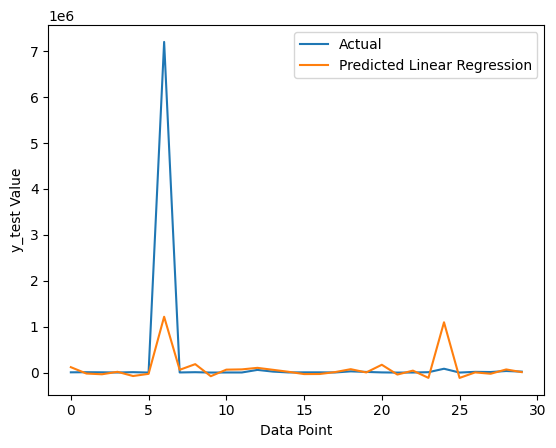

<Figure size 1200x400 with 0 Axes>

In [ ]:
sns.lineplot(x=range(len(y_test[:30])), y=y_test[:30], label='Actual')
sns.lineplot(x=range(len(y_lr_pred[:30])), y=y_lr_pred[:30], label='Predicted Linear Regression')

plt.xlabel("Data Point")
plt.ylabel("y_test Value")
plt.figure(figsize=(12, 4))
plt.show()

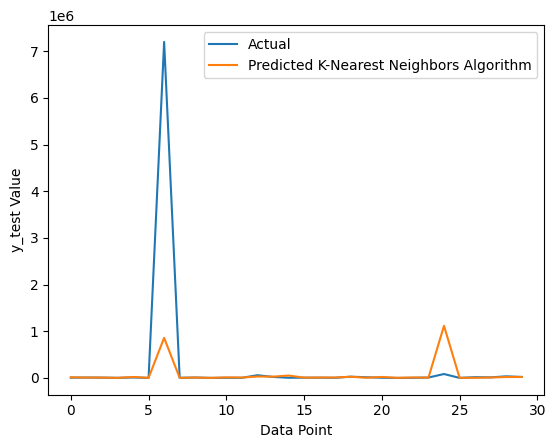

<Figure size 1200x400 with 0 Axes>

In [ ]:
sns.lineplot(x=range(len(y_test[:30])), y=y_test[:30], label='Actual')
sns.lineplot(x=range(len(y_knn_pred[:30])), y=y_knn_pred[:30], label='Predicted K-Nearest Neighbors Algorithm')

plt.xlabel("Data Point")
plt.ylabel("y_test Value")
plt.figure(figsize=(12, 4))
plt.show()

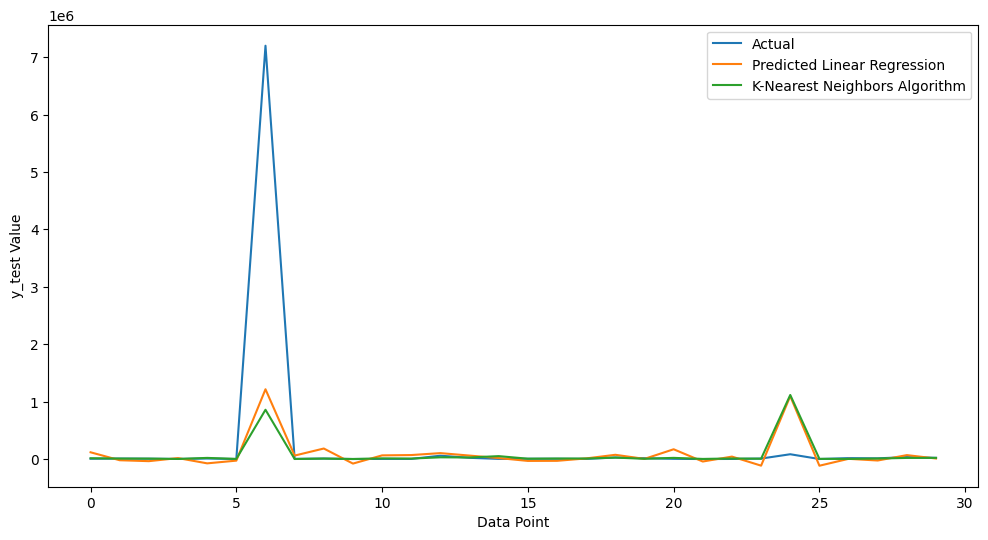

In [ ]:
plt.figure(figsize=(12, 6))
# Plot actual data
sns.lineplot(x=range(len(y_test[:30])), y=y_test[:30], label='Actual')
# Plot predicted data for Linear Regression
sns.lineplot(x=range(len(y_lr_pred[:30])), y=y_lr_pred[:30], label='Predicted Linear Regression')
# Plot predicted data for K-Nearest Neighbors Algorithm
sns.lineplot(x=range(len(y_knn_pred[:30])), y=y_knn_pred[:30], label='K-Nearest Neighbors Algorithm')
plt.xlabel("Data Point")
plt.ylabel("y_test Value")
plt.legend()
plt.show()